<h1 align="center">Volume 1: Facial Recognition.</h1>

    Marcelo Leszynski
    Math 345 Sec 001
    11/23/20

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
from imageio import imread
from scipy import linalg

### Helper Functions

In [3]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [4]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    reshaped = np.reshape(image, (m,n))  # resize the array
    plt.xticks([])
    plt.yticks([])
    plt.imshow(reshaped, cmap='gray')  # plot the resized image


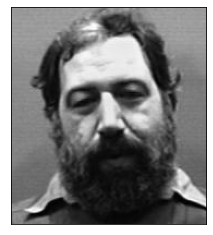

In [5]:
F = get_faces()
show(F[:,0])

In [6]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self._F = get_faces(path)
        self._mu = np.sum(self._F, axis=1) / np.shape(self._F)[1]  # computes the mean face of the dataset
        self._F_bar = (np.copy(self._F).T - np.copy(self._mu)).T  # computes the mean-shifted faces
        self._U, s, vh = linalg.svd(self._F_bar)  # computes the SVD and stores U

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        return (self._U[:,:s]).T @ A

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        F_hat = self.project(self._F_bar, s)  # project f_bar onto U_s
        g_hat = self.project((g - self._mu), s)  # project g onto U_s
        cols = [F_hat[:,i] - g_hat for i in range(F_hat[0].size)]  # create a list of the columns of F_hat minus g_hat
        norms = [linalg.norm(col) for col in cols]  # create a list of normed values
        return np.argmin(norms)

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        plt.subplot(121)  # plot the given image
        plt.title('orignal')
        show(image, m, n)
        plt.subplot(122)  # plot the best match
        plt.title('best match')
        index = self.find_nearest(image, s)
        show(self._F[:,index], m, n)

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

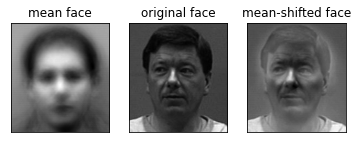

In [7]:
my_fr = FacialRec()
plt.subplot(131)  # plot the mean face
plt.title('mean face')
show(my_fr._mu)
plt.subplot(132)  # plot the original face
plt.title('original face')
show(my_fr._F[:,1])
plt.subplot(133)  # plot the mean-shifted face
plt.title('mean-shifted face')
show(my_fr._F_bar[:,1])


### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


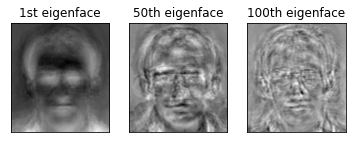

In [8]:
plt.subplot(131)
plt.title('1st eigenface')
show(my_fr._U[:,0])  # plot the first eigenface
plt.subplot(132)
plt.title('50th eigenface')
show(my_fr._U[:,49])  # plot the 50th eigenface
plt.subplot(133)
plt.title('100th eigenface')
show(my_fr._U[:,99])  # plot the 100th eigenface

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

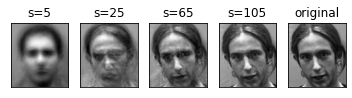

In [9]:
# desired face is at 152
index = np.random.randint(153)
plt.subplot(151)  # plot the reconstruction with s = 5
plt.title('s=5') 
projected = my_fr.project(my_fr._F_bar[:,index], 5)
reconstucted = (my_fr._U[:,:5] @ projected) + my_fr._mu
show(reconstucted)
plt.subplot(152)  # plot the reconstruction with s = 25
plt.title('s=25')
projected = my_fr.project(my_fr._F_bar[:,index], 25)
reconstucted = (my_fr._U[:,:25] @ projected) + my_fr._mu
show(reconstucted)
plt.subplot(153)  # plot the reconstruction with s = 65
plt.title('s=65')
projected = my_fr.project(my_fr._F_bar[:,index], 65)
reconstucted = (my_fr._U[:,:65] @ projected) + my_fr._mu
show(reconstucted)
plt.subplot(154)  # plot the reconstruction with s = 105
plt.title('s=105')
projected = my_fr.project(my_fr._F_bar[:,index], 105)
reconstucted = (my_fr._U[:,:105] @ projected) + my_fr._mu
show(reconstucted)
plt.subplot(155)  # plot the original face
plt.title('original')
show(my_fr._F[:,index])

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

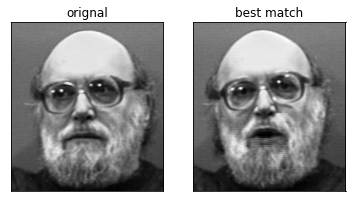

In [27]:
rand_faces = [i for i in sample_faces(5)]

my_fr.match(rand_faces[0], 39)


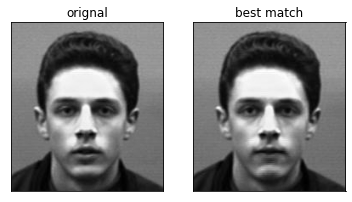

In [23]:
my_fr.match(rand_faces[1], 100)

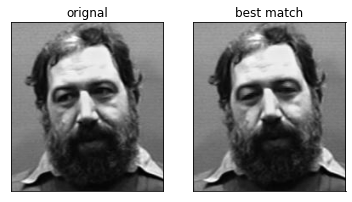

In [28]:
my_fr.match(rand_faces[2], 100)

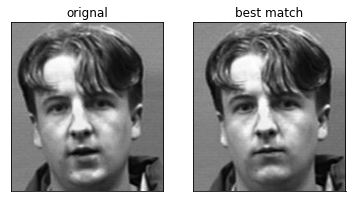

In [13]:
my_fr.match(rand_faces[3], 100)

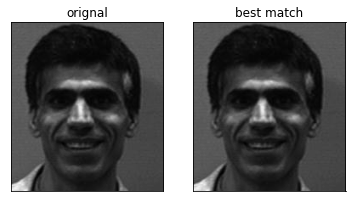

In [14]:
my_fr.match(rand_faces[4], 100)